# 太陽能資訊

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
!wget https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_day_2023-05-01.json

--2023-06-26 14:40:03--  https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_day_2023-05-01.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 410 [text/plain]
Saving to: ‘plant02_day_2023-05-01.json’

plant02_day_2023-05 100%[===================>]     410  --.-KB/s    in 0s      

2023-06-26 14:40:04 (26.5 MB/s) - ‘plant02_day_2023-05-01.json’ saved [410/410]



In [3]:
base_path = './'

In [4]:
import json
ffn = os.path.join(base_path, 'plant02_day_2023-05-01.json')
with open(ffn, 'r') as f:
    data = json.load(f)


In [5]:
data = data['data']

In [6]:
data

{'capacity': 208.3,
 'date': '2023-05-01',
 'deg4kw': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.09,
  0.22,
  0.41,
  0.58,
  0.66,
  0.72,
  0.72,
  0.64,
  0.53,
  0.33,
  0.16,
  0.06,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'hour': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'sun': [0,
  0,
  0,
  0,
  0,
  10,
  103,
  263,
  490,
  682,
  827,
  894,
  884,
  785,
  658,
  367,
  166,
  64,
  4,
  0,
  0,
  0,
  0,
  0],
 'total_e': [0,
  0,
  0,
  0,
  0,
  0,
  18,
  45,
  86,
  120,
  137,
  149,
  149,
  134,
  111,
  69,
  33,
  12,
  0,
  0,
  0,
  0,
  0,
  0]}

In [7]:
data.keys()

dict_keys(['capacity', 'date', 'deg4kw', 'hour', 'sun', 'total_e'])

### 畫出整廠的發電

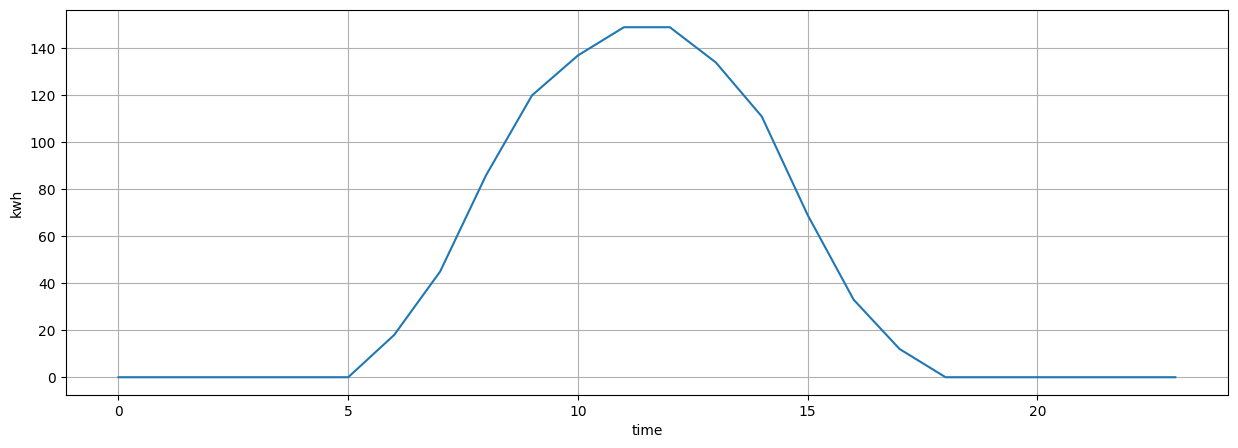

In [8]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['total_e'])
plt.xlabel('time')
plt.ylabel('kwh')
#plt.xticks(data['hour'], rotation=90)
plt.grid()
plt.show()

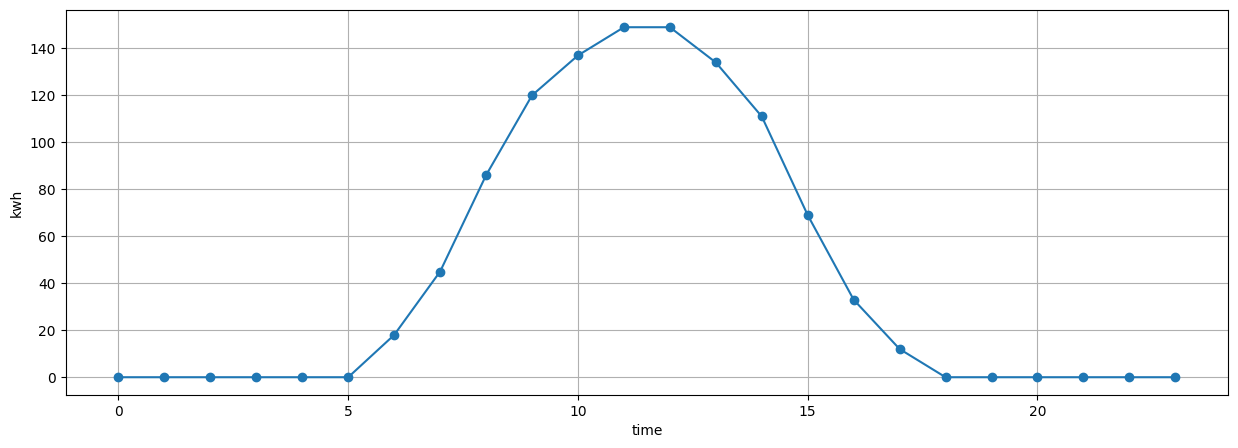

In [9]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['total_e'], '-o')
plt.xlabel('time')
plt.ylabel('kwh')
#plt.xticks(data['hour'], rotation=90)
plt.grid()
plt.show()

### 這樣並否容易評估發電是否夠好
- 我們一般會把數據uni-form
- 除以整個設置容量: kWh/capacity=kWh/kWp = deg4kw

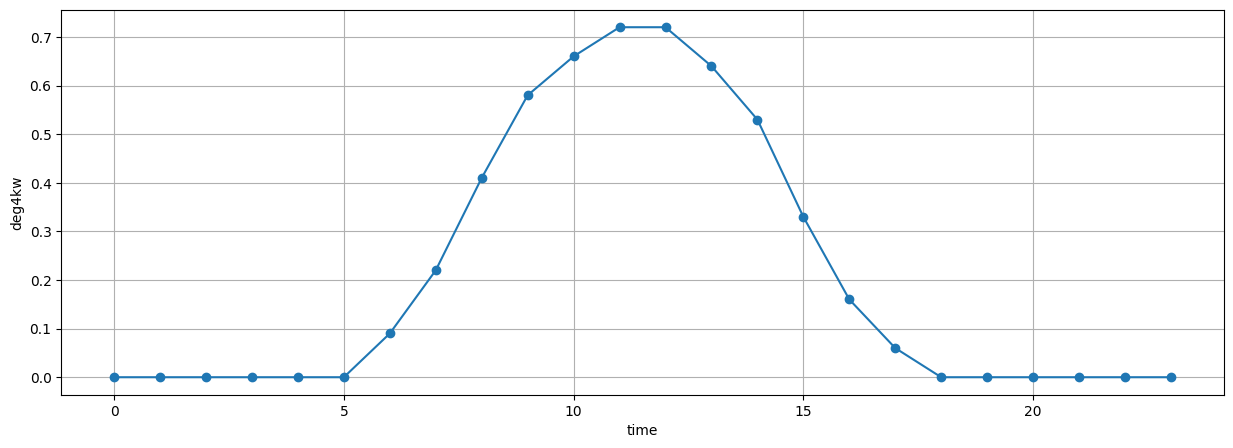

In [10]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.show()

### 雖然這樣讓我們更清楚發電達到什麼水準了，但有時不太夠!

- 我們來看一下5/7的趨勢圖

In [12]:
!wget https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_day_2023-05-07.json

--2023-06-26 14:41:06--  https://raw.githubusercontent.com/maloyang/hub202306-iot/main/02_data/plant02_day_2023-05-07.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388 [text/plain]
Saving to: ‘plant02_day_2023-05-07.json’

plant02_day_2023-05 100%[===================>]     388  --.-KB/s    in 0s      

2023-06-26 14:41:06 (24.2 MB/s) - ‘plant02_day_2023-05-07.json’ saved [388/388]



In [13]:
import json
ffn = os.path.join(base_path, 'plant02_day_2023-05-07.json')
with open(ffn, 'r') as f:
    data = json.load(f)

data = data['data']

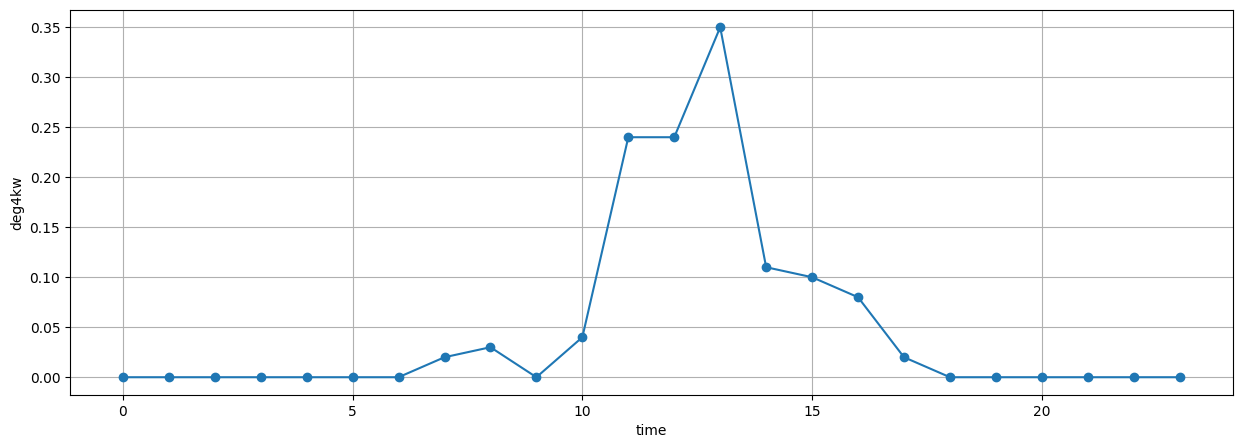

In [14]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.show()

### 把日照的資訊加進來

In [15]:
for i in range(len(data['sun'])):
    data['sun'][i]/=1000

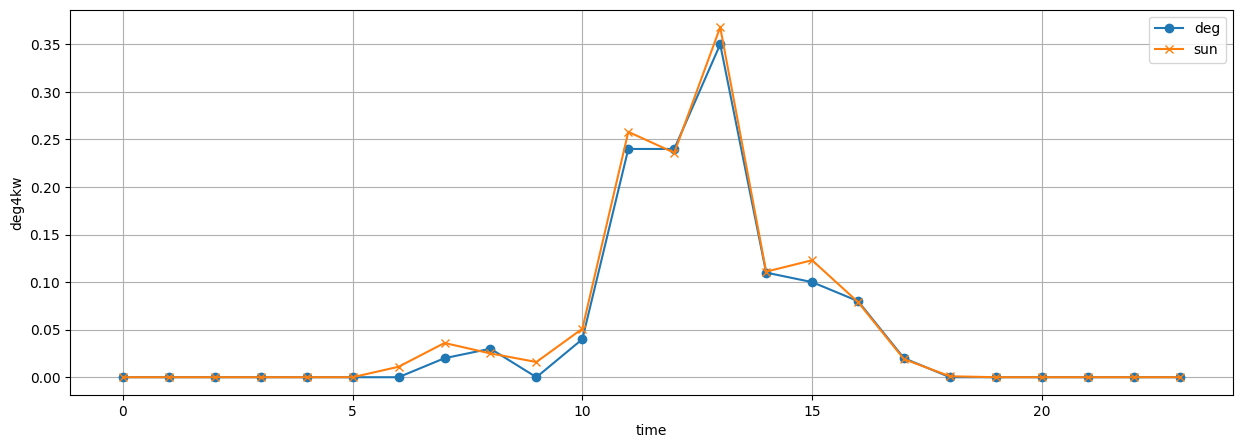

In [16]:
plt.subplots(figsize=(15,5))
plt.plot(data['hour'], data['deg4kw'], '-o', label='deg')
plt.plot(data['hour'], data['sun'], '-x', label='sun')
plt.xlabel('time')
plt.ylabel('deg4kw')
plt.grid()
plt.legend()
plt.show()